In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from itertools import product
from copy import deepcopy

In [30]:
sci_dirs = sorted(glob.glob('/data/scratch/bariskurtkaya/dataset/NIRCAM/4454/fits_arrays/*'))
len(sci_dirs)

11

In [31]:
sci_dirs

['/data/scratch/bariskurtkaya/dataset/NIRCAM/4454/fits_arrays/4454_F182M_HD-111733-STAR2_psfstack_sci_4.npy',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/4454/fits_arrays/4454_F210M_HD-111733-STAR2_psfstack_sci_0.npy',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/4454/fits_arrays/4454_F210M_HD-111733-STAR2_psfstack_sci_5.npy',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/4454/fits_arrays/4454_F210M_HD-111733-STAR2_psfstack_sci_6.npy',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/4454/fits_arrays/4454_F210M_HD-111733-STAR2_psfstack_sci_8.npy',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/4454/fits_arrays/4454_F250M_HD-111733-STAR2_psfstack_sci_2.npy',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/4454/fits_arrays/4454_F335M_HD-111733-STAR2_psfstack_sci_1.npy',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/4454/fits_arrays/4454_F335M_HD-111733-STAR2_psfstack_sci_3.npy',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/4454/fits_arrays/4454_F335M_HD-111733-STAR2_psfstack_sci_9.npy',
 '/data/sc

In [32]:
sci_arr = []
for sci in sci_dirs:
    arr = np.load(sci)
    sci_arr.append(arr)


In [33]:
def find_factors(input_num):
    factors = []
    for i in range(1, int(input_num**0.5) + 1):
        if input_num % i == 0:
            factors.append(i)
    
    pairs = []
    for factor in factors:
        pairs.append((factor, input_num // factor))
    
    return pairs[-1]

In [34]:
def plot_stack(stack):

    n = stack.shape[0]

    if n > 100:
        nrow, ncol = 10, 10
    
    else:
        nrow, ncol = find_factors(n)

    _, axes = plt.subplots(nrows=nrow,ncols=ncol,figsize=(20,10))

    for idx, (row, col) in enumerate(product(range(nrow),range(ncol))):

        axes[row][col].imshow(stack[idx])        
        axes[row][col].set_yticks([])
        axes[row][col].set_xticks([])


In [35]:
def nan2num(arr):
    
    copy_arr = deepcopy(arr)
    copy_arr = np.nan_to_num(copy_arr)

    return copy_arr

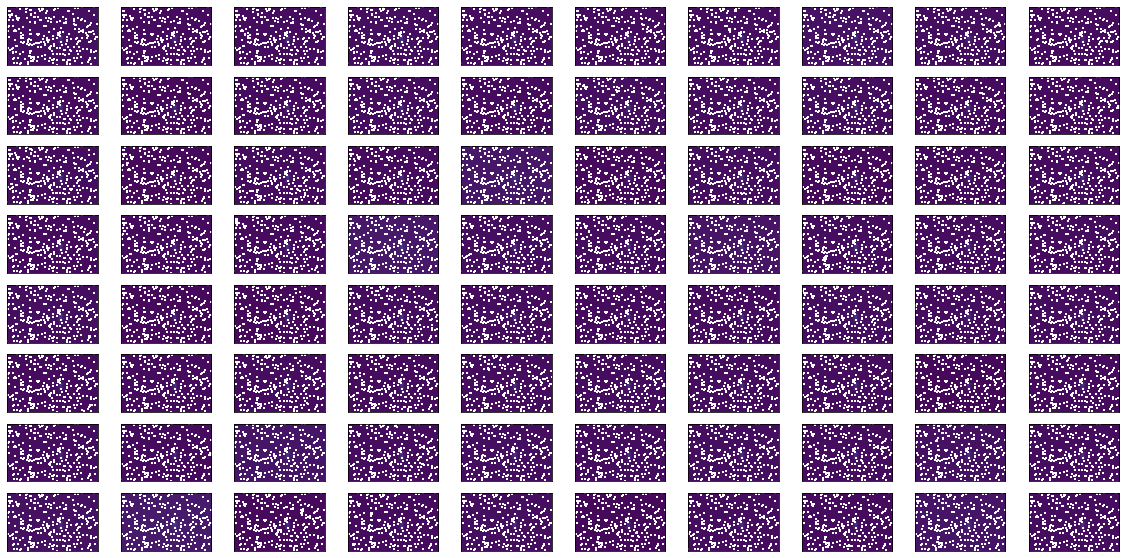

In [41]:
plot_stack(sci_arr[5])

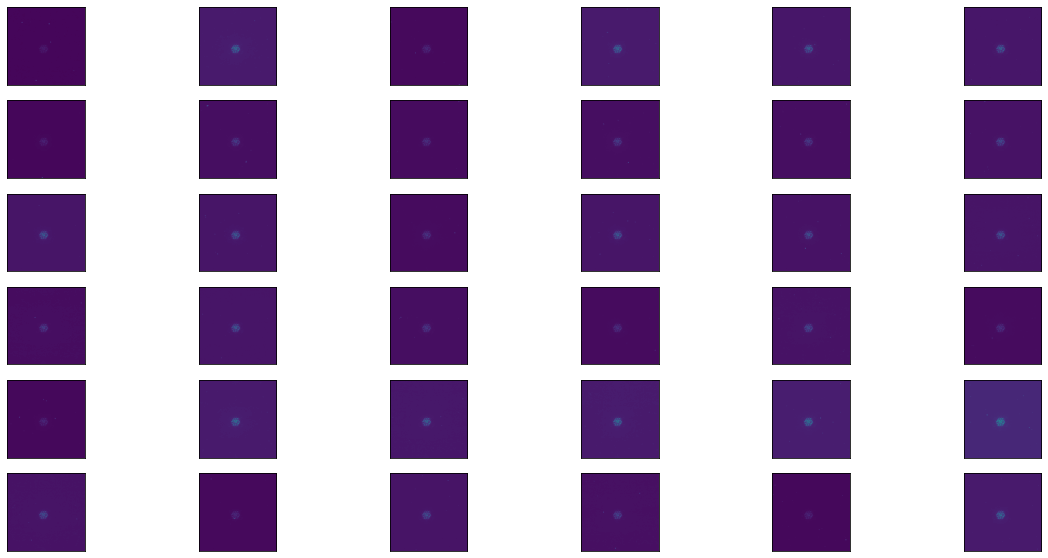

In [16]:
plot_stack(nan2num(sci_arr[0]))